# Step 1: Data Preparation

# Download and Extract Data:

Download the dataset from the provided Kaggle link.
Extract the contents of the downloaded zip file.

# Install Required Libraries:

In [1]:
!pip install numpy pandas opencv-python scikit-learn tensorflow


# Import Libraries:

In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


# Load and Preprocess Data:

In [3]:
data_dir = "C:\\Users\\Narthana\\Downloads\\brain_tumor_dataset"
categories = ['no', 'yes']

images = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_array, (100, 100))
        images.append(img_resized)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)


# Split Data into Training and Testing Sets:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# Normalize Data:

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0


# Step 2: Build and Train the Model
# Encode Labels:

In [6]:
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(y_train))
y_test = to_categorical(label_encoder.transform(y_test))


# Create the Convolutional Neural Network (CNN) Model:

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])


# Compile the Model:

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the Model:

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
7/7 [==============================] - 2s 246ms/step - loss: 1.3684 - accuracy: 0.5446 - val_loss: 0.7669 - val_accuracy: 0.7255
Epoch 2/10
7/7 [==============================] - 1s 204ms/step - loss: 0.6435 - accuracy: 0.7327 - val_loss: 0.4209 - val_accuracy: 0.8235
Epoch 3/10
7/7 [==============================] - 1s 181ms/step - loss: 0.4538 - accuracy: 0.8317 - val_loss: 0.4077 - val_accuracy: 0.8235
Epoch 4/10
7/7 [==============================] - 1s 189ms/step - loss: 0.3238 - accuracy: 0.8812 - val_loss: 0.3093 - val_accuracy: 0.8824
Epoch 5/10
7/7 [==============================] - 1s 182ms/step - loss: 0.2857 - accuracy: 0.9059 - val_loss: 0.2616 - val_accuracy: 0.9412
Epoch 6/10
7/7 [==============================] - 1s 183ms/step - loss: 0.1949 - accuracy: 0.9356 - val_loss: 0.2111 - val_accuracy: 0.9216
Epoch 7/10
7/7 [==============================] - 1s 185ms/step - loss: 0.1274 - accuracy: 0.9703 - val_loss: 0.2008 - val_accuracy: 0.9412
Epoch 8/10
7/7 [====

# Step 3: Evaluate the Model
# Evaluate Accuracy:

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')


2/2 [==============================] - 0s 28ms/step - loss: 0.2707 - accuracy: 0.9216
Test accuracy: 92.16%


# Inference on New Images:

In [11]:
def predict_tumor(image_path):
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img_array, (100, 100))
    img_normalized = img_resized / 255.0
    img_reshaped = np.reshape(img_normalized, (1, 100, 100, 1))
    prediction = model.predict(img_reshaped)
    label = categories[np.argmax(prediction)]
    return label


# Usage:

In [12]:
result = predict_tumor("C:\\Users\\Narthana\\Downloads\\Screenshot 2023-10-22 122447.png")
print(f'Predicted class: {result}')


1/1 [==============================] - 0s 84ms/step
Predicted class: no


In [13]:
result = predict_tumor("C:\\Users\\Narthana\\Downloads\\Screenshot 2023-10-22 122546.png")
print(f'Predicted class: {result}')


1/1 [==============================] - 0s 29ms/step
Predicted class: yes


# Data Visualization


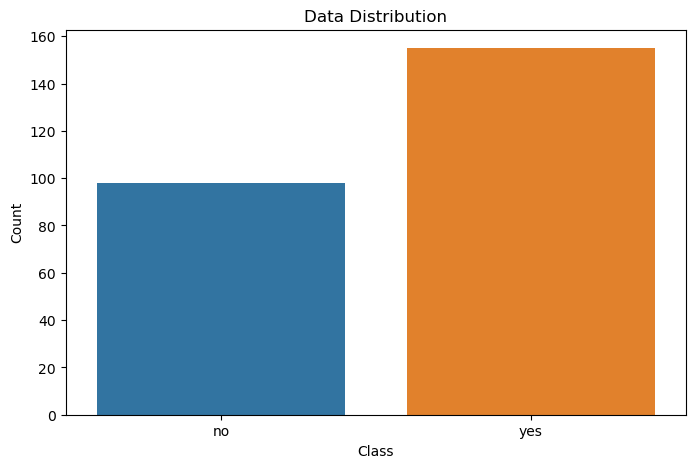

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of samples in each class
class_counts = np.unique(labels, return_counts=True)

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=class_counts[1])
plt.title('Data Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Sample Images:

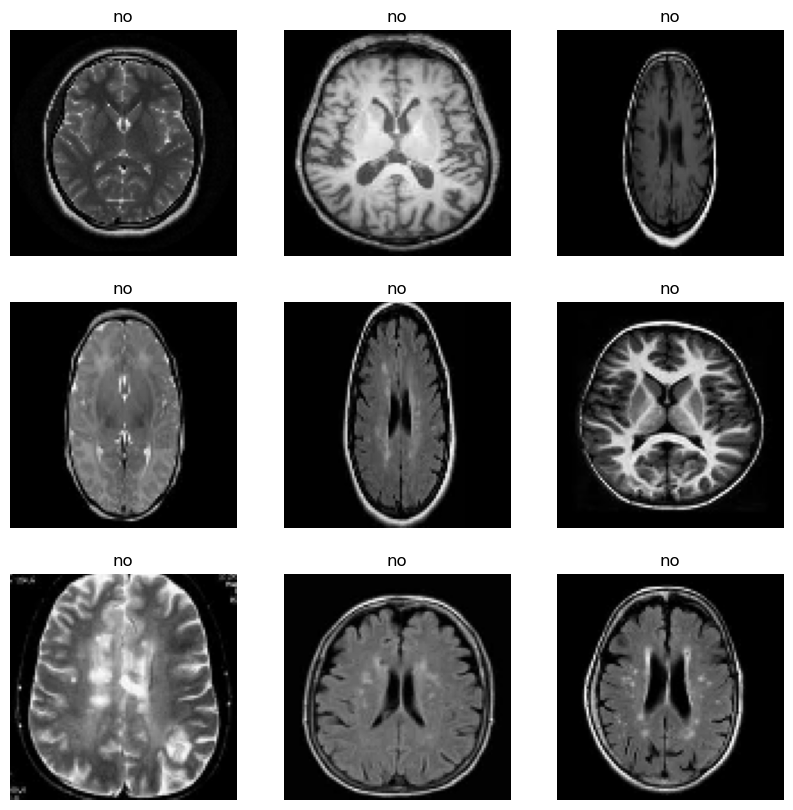

In [15]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(categories[labels[i]])
    plt.axis('off')
plt.show()


# Performance Visualization
# Training and Validation Loss and Accuracy:

Epoch 1/10
7/7 [==============================] - 1s 196ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.2324 - val_accuracy: 0.9216
Epoch 2/10
7/7 [==============================] - 1s 182ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.2567 - val_accuracy: 0.9216
Epoch 3/10
7/7 [==============================] - 1s 181ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.2836 - val_accuracy: 0.9216
Epoch 4/10
7/7 [==============================] - 1s 178ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.2649 - val_accuracy: 0.9020
Epoch 5/10
7/7 [==============================] - 1s 175ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2991 - val_accuracy: 0.9216
Epoch 6/10
7/7 [==============================] - 1s 175ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.3024 - val_accuracy: 0.9216
Epoch 7/10
7/7 [==============================] - 1s 168ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.2899 - val_accuracy: 0.9216
Epoch 8/10
7/7 [====

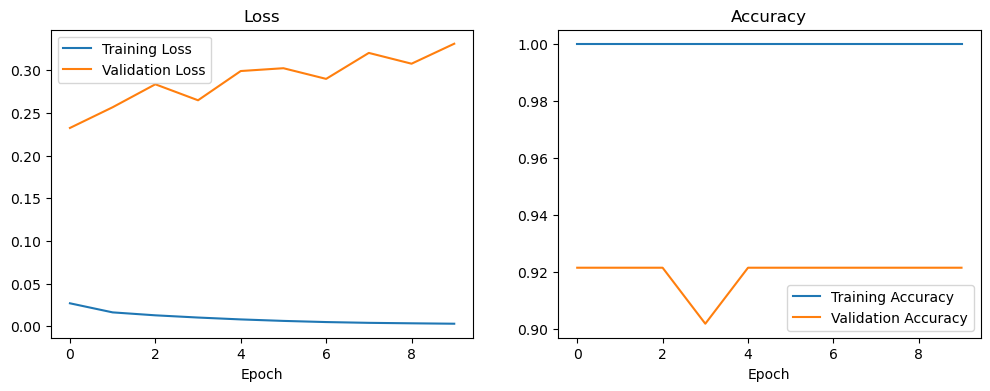

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()


# Inference and Results Visualization
# Predictions on New Images:

1/1 [==============================] - 0s 19ms/step


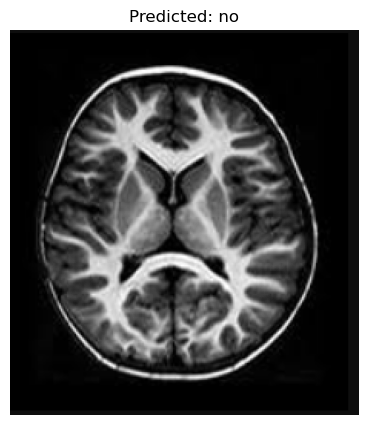

In [24]:
def visualize_predictions(image_path):
    result = predict_tumor(image_path)
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(5, 5))
    plt.imshow(img_array, cmap='gray')
    plt.title(f'Predicted: {result}')
    plt.axis('off')
    plt.show()

# Example usage
visualize_predictions("C:\\Users\\Narthana\\Downloads\\Screenshot 2023-10-22 122447.png")


1/1 [==============================] - 0s 22ms/step


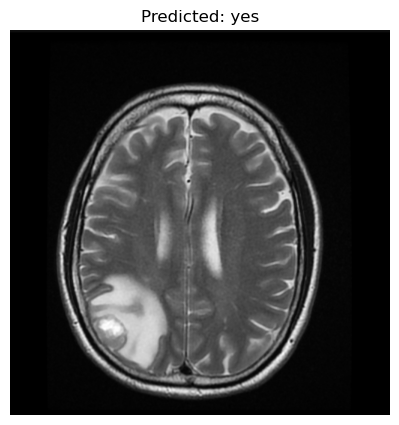

In [25]:
def visualize_predictions(image_path):
    result = predict_tumor(image_path)
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(5, 5))
    plt.imshow(img_array, cmap='gray')
    plt.title(f'Predicted: {result}')
    plt.axis('off')
    plt.show()

# Example usage
visualize_predictions("C:\\Users\\Narthana\\Downloads\\Screenshot 2023-10-22 122546.png")